<a href="https://mroc170.github.io/">mroc170.github.io</a>

<h1>Mason Riley O'Connor</h1>
<h1>CMPS3660 Tutorial Milestone 1</h1>

<p><a href="https://www.kaggle.com/cjgdev/formula-1-race-data-19502017#races.csv"> This data set</a> from <a href="kaggle.com">kaggle.com</a> is a set of csv files with Formula 1 race data from the past 70 years. Although it does not include the two most recent seasons, it is very thorough and has very few missing values. All tables have appropriate primary keys as well as foreign keys. In addition to the data set being large, thorough, and in an accessible format, I am also very interested in the subject matter and will be very engaged with the research and data. Formula 1 is known as a marvel of engineering and data optimization. Much of the data used by teams is kept private but these publicly known results are important nonetheless. This data set will allow me to analyze many relationships and make assertions about a subject matter I am familiar with.</p>

## Importing Data

In [295]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import cm
drivers_df = pd.read_csv("./data/drivers.csv", encoding = "ISO-8859-1", parse_dates=["dob"])
drivers_df = drivers_df[drivers_df.columns[0:-1]]
drivers_df.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality
0,1,hamilton,44.0,HAM,Lewis,Hamilton,1985-07-01,British
1,2,heidfeld,NaN,HEI,Nick,Heidfeld,1977-10-05,German
2,3,rosberg,6.0,ROS,Nico,Rosberg,1985-06-27,German
3,4,alonso,14.0,ALO,Fernando,Alonso,1981-07-29,Spanish
4,5,kovalainen,NaN,KOV,Heikki,Kovalainen,1981-10-19,Finnish



<p>I am particularly interested in analyzing the relationships that influence driver success in relation to their team situation and the situations of individual races. For teams, I am interested to see if there is a correlation between driver nationality and team nationality as well as the age of a team versus driver experience. For individual races there are many specific statistics that are not often brought up, and commentators and analysts tend to focus on the top drivers without talking about all of the racers. I'd like to analyze how drivers perform at tracks in their country as well as the country of their team and look at more specific stats like time of race, time zone of the track, and track characteristics to speculate how drivers may perform at new tracks added to the race calendar since 3 new tracks are being added in 2020 alone.</p>
<p>The scoring system for Formula 1 has been changed multiple times in the 90's alone which has influenced certain statistics on face Value. Titles like most points of all time and most points per race are both attributed to Lewis Hamilton despite more race wins by Michael Schumacher. A quick look at the top 10 drivers in this category reveal that this list is determined primarily by the era in which a driver competes. While the data set already has points awarded in the race statistics, I would like to look at these performances from different eras more objectively by categorizing them all with each of the points systems and seeing if any championship results change specifically and see if this data supports one points system over another. These files also contain information about mechanical failures and crashes in races that can be accounted for to adjust the real-world statistics with these DNFs that are not the fault of the driver to show a more accurate representation of driver talent.</p>
<p>This data set is very convenient, and I have found others to reference for additional data, although they may require more formatting to use effectively. There are many valuable questions that this data may help to answer, such as the relative efficacy of different points systems, whether or not car performance is overshadowing driver performance, and what tracks make for unpredictable race results.</p>

## Milestone 2:
Here I'll import the rest of the csvs

In [296]:
circuits_df = pd.read_csv("./data/circuits.csv", encoding = "ISO-8859-1")
circuits_df = circuits_df[circuits_df.columns[0:-2]] #removing the URL column and altitude since only 1 track has info
constructor_results_df = pd.read_csv("./data/constructorResults.csv", encoding = "ISO-8859-1")
constructor_results_df = constructor_results_df[constructor_results_df.columns[0:-1]] #removing status column as it is largely useless
constructors_df = pd.read_csv("./data/constructors.csv", encoding = "ISO-8859-1")
constructors_df = constructors_df[constructors_df.columns[0:-2]] #removing useless column and URL
#removing position text column (it is redundant in this context) and another empty column
constructor_standings_df = pd.read_csv("./data/constructorStandings.csv", encoding = "ISO-8859-1")[["constructorStandingsId", "raceId", "constructorId", "points", "position", "wins"]]
driver_standings_df = pd.read_csv("./data/driverStandings.csv", encoding = "ISO-8859-1")[["driverStandingsId", "raceId", "driverId", "points", "position", "wins"]]#removing position text column (it is redundant in this context)
laptimes_df = pd.read_csv("./data/lapTimes.csv", encoding = "ISO-8859-1")
pitstops_df = pd.read_csv("./data/pitStops.csv", encoding = "ISO-8859-1")
qualifying_df = pd.read_csv("./data/qualifying.csv", encoding = "ISO-8859-1")
races_df = pd.read_csv("./data/races.csv", encoding = "ISO-8859-1", parse_dates=["date"])
races_df = races_df[races_df.columns[0:-1]] #removing URL 
results_df = pd.read_csv("./data/results.csv", encoding = "ISO-8859-1") #although this df is wide, it is in fact tidy
#I didn't import the seaons csv because all it contains is the seaons and their wikipedia pages
status_df = pd.read_csv("./data/status.csv", encoding = "ISO-8859-1")

Let's clean up these dataframes a bit and check the datatypes. I'll explain each change in a comment before the operation.

In [297]:
#adding a full name category for more legible displays
drivers_df["Full Name"] = drivers_df["forename"] + ' ' + drivers_df["surname"]
#adding a unit variable to indicate race participation (this is useful for aggregating)
results_df["raced"] = 1
'''This block contains checks for setting data types
all the datatypes are correctly set (numbers, strings as objects, and datetime objects)
print(drivers_df.dtypes)
print(circuits_df.dtypes)
print(constructor_results_df.dtypes) #points are given as a float rather than int to accommodate for NaN values
print(constructors_df.dtypes)
print(constructor_standings_df.dtypes)
print(driver_standings_df.dtypes)
print(laptimes_df.dtypes)
print(pitstops_df.dtypes)
print(qualifying_df.dtypes)
print(races_df.dtypes)
print(results_df.dtypes)
print(status_df.dtypes)
''';

In [298]:
#since no driver Full Name appears more than once, it is also appropriate to use as a primary key if need be
drivers_df["Full Name"].value_counts().max()

1

## Exploratory analysis

These dataframes form a relational database and are connected by numerical IDs. The information for drivers, constructors, and circuits are stored in their respective dtaframes. The results for drivers and constructors are held in the results dataframes, and the standings after each race in their own dataframes. The status dataframe has only one column that connects different IDs to different results that represent a driver's finishing status for a race. The rest of the dataframes contain information about specific races, laps, qualifying, and pitstops.

### Nationality Breakdown

Our data set has 842 different drivers from 41 different countries.
Here is a pie chart showing the distribution of driver nationality:


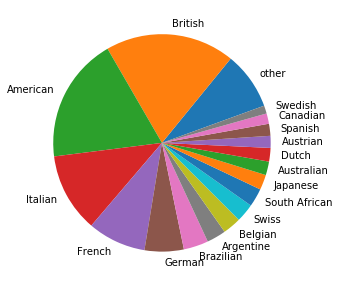

In [299]:
print("Our data set has " +str(drivers_df.shape[0])+ " different drivers from "
      + str(len(drivers_df["nationality"].unique())) + " different countries.")

#getting number of drivers from every country and normalizing
national_breakdown = drivers_df["nationality"].value_counts() / drivers_df["nationality"].value_counts().sum()
#initializing plottable version of this series
plottable_national_breakdown = pd.Series()
#initializing "other" label for countries with small counts
plottable_national_breakdown["other"] = 0
#populating plottable_national_breakdown
for i, value in national_breakdown.iteritems():
    #if the value is significant, add it
    if value > 0.011:
        plottable_national_breakdown[i] = value
    #if the value is insignificant, add it to other
    else:
        plottable_national_breakdown["other"] += value
    
print("Here is a pie chart showing the distribution of driver nationality:")
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(plottable_national_breakdown.values, labels=plottable_national_breakdown.index, startangle=20)
plt.show()

This pie chart clearly illustrates the predominance of European, and specifically British drivers. The large number of American drivers is due to the Indianapolis 500 counting towards the Formula 1 World Championship during the 1950s.

Let's also take a look at the teams and where they are from.

Our data set has 208 different teams from 24 different countries.
Here is a pie chart showing the distribution of team nationality:


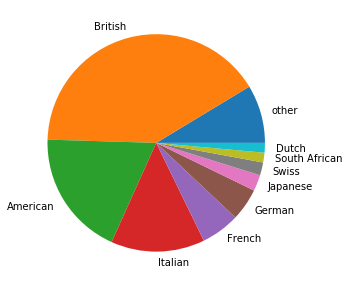

In [300]:
print("Our data set has " +str(constructors_df.shape[0])+ " different teams from "
      + str(len(constructors_df["nationality"].unique())) + " different countries.")

#getting number of constructors from every country and normalizing
national_breakdown = constructors_df["nationality"].value_counts() / constructors_df["nationality"].value_counts().sum()
#initializing plottable version of this series
plottable_national_breakdown = pd.Series()
#initializing "other" label for countries with small counts
plottable_national_breakdown["other"] = 0
#populating plottable_national_breakdown
for i, value in national_breakdown.iteritems():
    #if the value is significant, add it
    if value > 0.01:
        plottable_national_breakdown[i] = value
    #if the value is insignificant, add it to other
    else:
        plottable_national_breakdown["other"] += value
    
print("Here is a pie chart showing the distribution of team nationality:")
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(plottable_national_breakdown.values, labels=plottable_national_breakdown.index)
plt.show()

Again this chart is affected by the American teams that only raced in the Indianapolis 500. This chart also shows the immense proportion of British teams that have participated in the sport.

Let's also take a look at where the races are taking place.

In [301]:
print("Our data set has " +str(circuits_df.shape[0])+ " different tracks from "
      + str(len(circuits_df["country"].unique())) + " different countries.")

print("Our data set also has information from " +str(races_df.shape[0]) + " different races.")

Our data set has 73 different tracks from 32 different countries.
Our data set also has information from 997 different races.


Let's again create a pie chart to look at the distribution of different race locations. Since some of these circuits are on the F1 calendar year after year and others were only used a handful of times, it is important to utilize the races dataframe as well to account for how many times each circuit was used.

Here is a pie chart showing the distribution of countries where races have taken place:


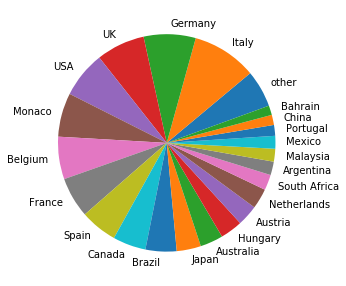

In [302]:
#obtaining dataframe of races with country info by merging with circuits
races_with_tracks = races_df.merge(circuits_df, on=["circuitId"], suffixes=["_race", "_track"])

#getting number of races from every country and normalizing
nat_track_breakdown = races_with_tracks["country"].value_counts() / races_with_tracks["country"].value_counts().sum()
#initializing plottable version of this series
plot_track_breakdown = pd.Series()
#initializing "other" label for countries with small counts
plot_track_breakdown["other"] = 0
#populating plottable_national_breakdown
for i, value in nat_track_breakdown.iteritems():
    #if the value is significant, add it
    if value > 0.012:
        plot_track_breakdown[i] = value
    #if the value is insignificant, add it to other
    else:
        plot_track_breakdown["other"] += value
    
    
print("Here is a pie chart showing the distribution of countries where races have taken place:")
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(plot_track_breakdown.values, labels=plot_track_breakdown.index, startangle=20)
plt.show()

Again we see see predominantly European countries making up the Formula 1 schedule.

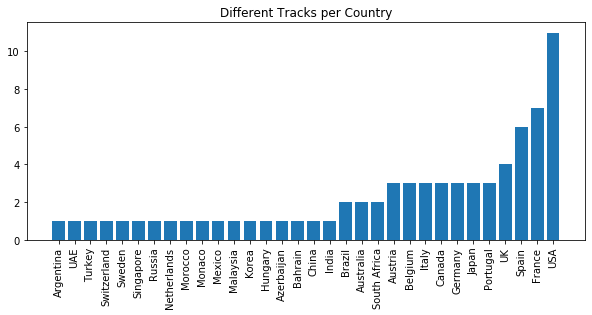

In [303]:
tracks_per_country = circuits_df.groupby("country")["name"].count().sort_values()
fig, ax = plt.subplots(figsize=(10,4))
plt.xticks(rotation='vertical')
ax.bar(x=tracks_per_country.index, height=tracks_per_country.values)
plt.title("Different Tracks per Country");

This chart shows the number of different tracks that have been raced at in each country. Most of the countries have only had races at one location, either because they have namestay tracks (like Monaco) or because they were only on the calendar for a limited time. The USA is a clear standout becuase Formula 1 has historically struggled to finda track to captivate an American audience.

### Driver Numbers

In [304]:
'''This block contains checks for setting data types
all the datatypes are correctly set (numbers, strings as objects, and datetime objects)
print(drivers_df.dtypes)
print(circuits_df.dtypes)
print(constructor_results_df.dtypes) #points are given as a float rather than int to accommodate for NaN values
print(constructors_df.dtypes)
print(constructor_standings_df.dtypes)
print(driver_standings_df.dtypes)
print(laptimes_df.dtypes)
print(pitstops_df.dtypes)
print(qualifying_df.dtypes)
print(races_df.dtypes)
print(results_df.dtypes)
print(status_df.dtypes)
''';

laptimes_at_tracks = laptimes_df.merge(races_with_tracks, on="raceId", suffixes=['_lap', '_race'])
laptimes_at_tracks#.groupby(circuitRef)

#fig, ax = plt.subplots(figsize=(8,6))
#for label, df in laptimes_at_tracks.groupby('circuitRef'):
#    df = df[["year"]]

,raceId,driverId,lap,position,time_lap,milliseconds,year,round,circuitId,name_race,date,time_race,circuitRef,name_track,location,country,lat,lng
0,841,20,1,1,1:38.109,98109,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680
1,841,20,2,1,1:33.006,93006,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680
2,841,20,3,1,1:32.713,92713,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680
3,841,20,4,1,1:32.803,92803,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680
4,841,20,5,1,1:32.342,92342,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680
5,841,20,6,1,1:32.605,92605,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680
6,841,20,7,1,1:32.502,92502,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680
7,841,20,8,1,1:32.537,92537,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680
8,841,20,9,1,1:33.240,93240,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680
9,841,20,10,1,1:32.572,92572,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680


Now that we have a good overview of the data, let's look at some results from Lewis Hamilton, one of F1's most iconic drivers, and his records at different circuits.

### Lewis Hamilton

In [305]:
#hamilton's driver ID is 1, so this comprehension filters for just hamilton's results
hamilton_results = results_df[results_df["driverId"] == 1]
hamilton_results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,raced
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,1,1
26,27,19,1,1,22.0,9,5.0,5,5,4.0,56,46.548,5525103.0,53.0,3.0,01:35.5,209.033,1,1
56,57,20,1,1,22.0,3,13.0,13,13,0.0,56,NaN,NaN,25.0,19.0,01:35.5,203.969,11,1
68,69,21,1,1,22.0,5,3.0,3,3,6.0,66,4.187,5903238.0,20.0,3.0,01:22.0,204.323,1,1
89,90,22,1,1,22.0,3,2.0,2,2,8.0,58,3.779,5213230.0,31.0,2.0,01:26.5,222.085,1,1


These results have the information on both starting position (grid) and race finish position (position). Lets put these on a heat map and see how pole position affects hamilton's results.

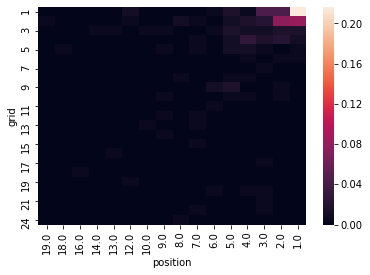

In [306]:
h_grid_result = pd.crosstab(hamilton_results.grid, hamilton_results.position, normalize=True) #making a pivot table of grid vs position
ax = sns.heatmap(h_grid_result) #heatmapping result
ax.invert_xaxis() #inverting x axis to put 1/1 in top right

This graph doesn't make the correlation entirely clear because all most of the data points are around the same area. All this graph tells us is something we already know: Hamilton is good at racing. Let's try looking at the same graph but for all drivers.

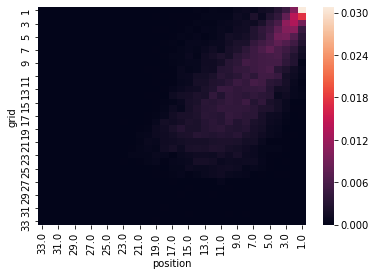

In [307]:
results_qualified = results_df[results_df["grid"] != 0]
all_grid_result = pd.crosstab(results_qualified.grid, results_qualified.position, normalize=True)
ax = sns.heatmap(all_grid_result)
ax.invert_xaxis()

This graph makes it much more clear there is a correlation between grid position and finish position with the majority of points close to the main diagonal. The reason the graph seems more populated at higher places is due to the fluctuating number of cars that finish races, so more results are recorded towards the top and retirements are not pictured in this heatmap.
Now that we have observed a correlation, lets quantify it and see if Hamilton is as dependent on starting position as the rest of the drivers.

In [308]:
#calculating correlation for all drivers
all_sf_corr = results_qualified["grid"].corr(results_qualified["position"])
#calculating correlation for hamilton
ham_sf_corr = hamilton_results["grid"].corr(hamilton_results["position"])
print("Average Correlation " + str(all_sf_corr))
print("Hamilton's Correlation " + str(ham_sf_corr))

Average Correlation 0.6513810621913182
Hamilton's Correlation 0.40561126326253893


So both contain a non-negligible correlation, but Hamilton's fate is not as dependent on his qualifying performances as other drivers. Let's try to see if this is due to working his way up the pack or squandering pole position by looking at his performance on pole vs further back in the grid. We will exclude retirements since they are not as tied to driver performance.

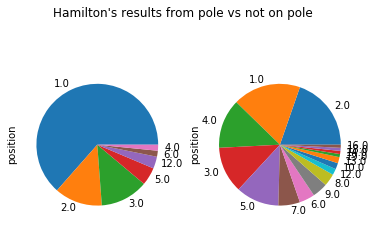

In [309]:
fig, axs = plt.subplots(1,2)
hamilton_results[hamilton_results.grid == 1].position.value_counts().plot.pie(ax=axs[0])
hamilton_results[hamilton_results.grid != 1].position.value_counts().plot.pie(ax=axs[1])
plt.suptitle("Hamilton's results from pole vs not on pole");

So when Hamilton starts on pole, he wins more than half the time, with the second most common result being second place. When he doesn't start on pole, he still finishes in the top 4 over half the time, and rarely finishes outside the points. Let's again compare this to all of our recorded results:

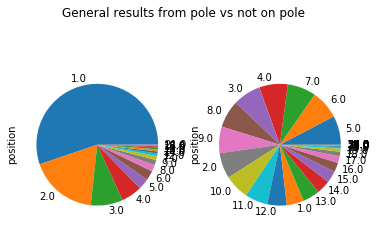

In [310]:
fig, axs = plt.subplots(1,2)
results_df[results_df.grid == 1].position.value_counts().plot.pie(ax=axs[0])
results_df[results_df.grid != 1].position.value_counts().plot.pie(ax=axs[1])
plt.suptitle("General results from pole vs not on pole");

These pie charts show that Hamilton not only converts the pole to a win significantly more often, he also wins much more often while starting out of position. This may not be the most fair comparison since Hamilton's starting positions are fairly high, even when not on pole.

Let's see how he tends to perform differently on different tracks. 

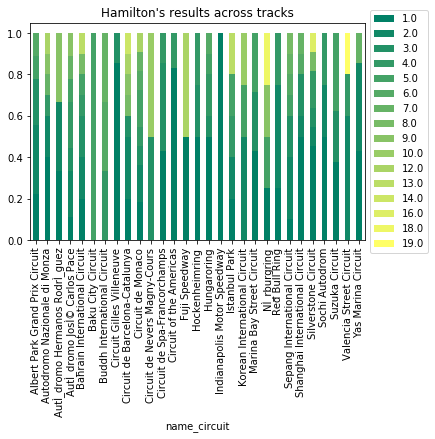

In [311]:
#merging races_df with circuits_df to get track name for each race
races_with_circuit = races_df.merge(circuits_df, on="circuitId", suffixes=["", "_circuit"])

ham_circuit_finishes = races_with_circuit.merge(hamilton_results, 
                                                on="raceId", 
                                                suffixes=["_race","_driver"]
                                                ).pivot_table(index="name_circuit",
                                                              columns="position",
                                                              values="circuitRef",
                                                              aggfunc="count")
ham_normal_finishes = ham_circuit_finishes.divide(ham_circuit_finishes.sum(axis=1), axis=0)
ham_normal_finishes.plot.bar(stacked=True, legend=False, cmap="summer")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Hamilton's results across tracks");

From this graph we can see that Hamilton has won at all but 5 of the circuits he has raced at. It also shows his domination at American tracks like The Circuit of the Americas and Indianapolis Motor Speedway.
But perhaps we are being a bit too cavalier by focusing on Hamilton before looking at other great drivers. Let's take a few approaches to looking at top drivers, starting with who has the most wins.

### The Greats

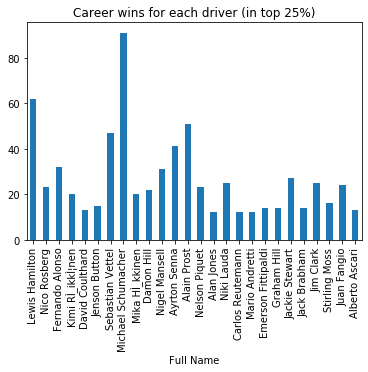

In [312]:
race_wins = results_df[results_df["position"] == 1] #filtering for race wins
win_counts = race_wins.groupby(race_wins["driverId"]).raced.sum() #counting race wins for each driver
win_counts_with_name = drivers_df.merge(win_counts, on="driverId") #merging with driver_df to see names
high_counts = win_counts_with_name[win_counts_with_name["raced"] > win_counts_with_name["raced"].quantile(.75)] #filtering to drivers who are in the top 25% of winners
high_counts.set_index("Full Name").raced.plot.bar() #plotting wins across drivers
plt.title("Career wins for each driver (in top 25%)");

While Hamilton is certainly a standout on this graph, he is quite far behind Michael Schumacher in terms of sheer wins. Let's look at how many races drivers have competed in as well to account for volume.

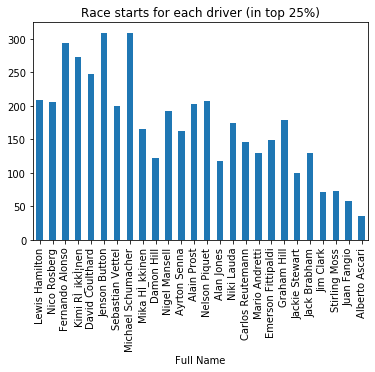

In [313]:
races_series = results_df.groupby(results_df["driverId"]).raced.sum() #finding number of races for each driverID
drivers_tally = high_counts.merge(races_series, on="driverId", suffixes=["_win", "_start"]) #merging race starts to drivers 
drivers_tally.set_index("Full Name").raced_start.plot.bar() #plotting race starts
plt.title("Race starts for each driver (in top 25%)");

This plot looks significantly different, but Michael Schumacher is still at the top, which shows that his high volume of starts may have something to do with being the winningest driver in F1 history. Let's take a look at winning percentages to see if he was as consistent as Hamilton

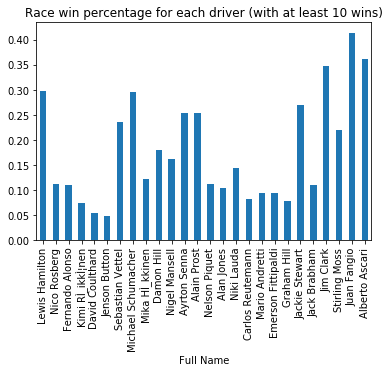

In [314]:
drivers_tally["win_percentage"] = drivers_tally["raced_win"] / drivers_tally["raced_start"]
drivers_tally.set_index("Full Name").win_percentage.plot.bar() #plotting race starts
plt.title("Race win percentage for each driver (with at least 10 wins)");

Looking at this graph of win percentages shows that Hamilton and Schumacher are neck and neck in terms of percentage. The drivers that stand out are Jim Clark, Juan Manuel Fangio, and Alberto Ascari, who all had incredibly short but prolific careers.

Of course titles like winningest driver are important, but what solidified Hamilton and Schumacher in F1 history is their multiple world titles. Schumacher is a 7 time world champion and Hamilton is a 6 time world champion (his 2 most recent championship winning seasons are not included in this data set).

The champion is determined by whoever scores the most points over the course of a season. Since Schumacher has more world titles and more wins, we'd expect him to have more points. Let's verify this.

### Getting to the Point(s)

Working with a driver's points is complicated since the points are contained in the driver_standings_df and it contains information from every race rather than every season, so many points are repeated. To find a drivers actual points tally, we need to identify the standings from the last race of every season and sum those rather than all of the standings for each driver.

In [315]:
races_in_year = races_df.groupby('year')["round"].max()

Here we've actually stumbled onto another interesting piece of data. We have the number of races from each year, so let's take a quick aside to graph this.

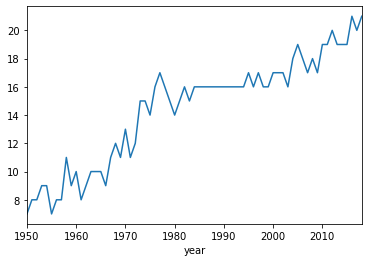

In [316]:
races_in_year.plot.line();

This graph demonstrates the steady increase of Formula 1 races each year. It is predicted that by 2020 we will have a record 24 race calendar. 

Now back to finding the points tallies.

In [317]:
#inner joining the races_df with races_in_year
season_enders = races_df.merge(races_in_year, on=["round", "year"])
#now we have the raceIds for every final race of the year
#this will allow us to filter the standings to only finishing results

#inner joining driver_standings_df with season_enders to yield final season tallies for every driver
drivers_season_standings = driver_standings_df.merge(season_enders, on=['raceId'])
drivers_season_standings.head()

,driverStandingsId,raceId,driverId,points,position,wins,year,round,circuitId,name,date,time
0,355,35,1,98.0,1,5,2008,18,18,Brazilian Grand Prix,2008-11-02,17:00:00
1,356,35,2,60.0,6,0,2008,18,18,Brazilian Grand Prix,2008-11-02,17:00:00
2,357,35,3,17.0,13,0,2008,18,18,Brazilian Grand Prix,2008-11-02,17:00:00
3,358,35,4,61.0,5,2,2008,18,18,Brazilian Grand Prix,2008-11-02,17:00:00
4,359,35,5,53.0,7,1,2008,18,18,Brazilian Grand Prix,2008-11-02,17:00:00


The new drivers_season_standings dataframe actually allows us to perform many interesting analyses that we will get to later, but for now let's tally up career points for each driver.

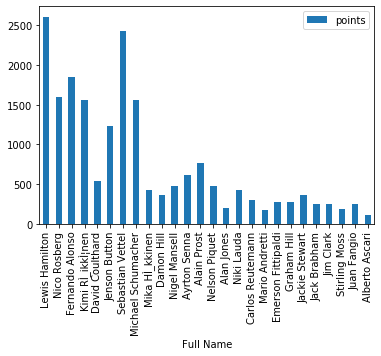

In [318]:
#grouping season standings by driver Id and summing points to get a total tally of points for each driver ID
lifetime_points = drivers_season_standings.groupby('driverId')["points"].sum()
#inner joining wtih high_counts to get driver names
#this join can be performed with all of the drivers but there are too many drivers to sufficiently graph
lifetime_points_df = high_counts.merge(lifetime_points, on="driverId")
#filtering for high results to weed 
ax = lifetime_points_df.plot.bar(x="Full Name", y="points");

At first this graph seems jarring, since Michael Schumacher isn't even in the top 3 points scorers. Any Formula 1 fans would tell you that the title of "driver with most points" is somewhat irrelevant since Formula 1 has changed their points scheme throughout the years. <a href="https://en.wikipedia.org/wiki/List_of_Formula_One_World_Championship_points_scoring_systems#Points_scoring_systems"> This wikipedia article</a> details the different systems if you are curious.

To new motorsport fans the points system may seem somewhat arbitrary. Obviously the winner of a race is whoever crosses the finish line first, but the winner of a season of racing is not so straightforward. In head-to-head sports like football it is easy to derive points from a win-loss record, but motorsport does not have such luxuries. The points system used in Formula 1 has been the subject of many debates, since there is no head-to-head playoff structure. 

## Exploring the Hypothesis

Let's look at all of the race results under each of the previous points systems (and some others) to see if any championship results would have changed, and determine if those changes are for the better.

The first step is to create series to represent the scoring under each different system so that we can map finishing place to their respective points.

In [319]:
#creating dictionaries with position as key and points as value
points2010_18 = pd.Series([25,18,15,12,10,8,6,4,2,1], [1,2,3,4,5,6,7,8,9,10]).to_dict()
points2003_09 = pd.Series([10,8,6,5,4,3,2,1], [1,2,3,4,5,6,7,8]).to_dict()
points1991_2002 = pd.Series([10,6,4,3,2,1], [1,2,3,4,5,6]).to_dict()
points1961_90 = pd.Series([9,6,4,3,2,1], [1,2,3,4,5,6]).to_dict()
points1960 = pd.Series([8,6,4,3,2,1], [1,2,3,4,5,6]).to_dict()
points1950_59 = pd.Series([8,6,4,3,2], [1,2,3,4,5]).to_dict()
pointsReverse = pd.Series(list(range(1,21))[::-1], list(range(1,21))).to_dict() 
#this last one is a proposed (and largely contested) points system where all drivers earn points opposite their finishing position
pointsExp = pd.Series(list(map(lambda x: 2 ** x, list(range(0,20))[::-1])), list(range(1,21))).to_dict()
#this is a points system that gives all drivers points, but on an exponential scale instead of linear
#in essence it makes each place finish worth one half of the place above it
#this system works well if you'd like to think of a first place finish as twice a second place finish
#but it makes lower place finishes negligible beyond being tiebreakers

Before simply mapping the points onto the results, we need to discuss the difference between the position, positionText, and positionOrder columns. Position is numerical given finishing position if the driver was counted (which in Formula 1 means they finished 90% of the laps). positionText is the same information but NaNs for DNFs are replaced with R for retirement or D for disqualified. positionOrder contains only integers for position regardless of whether or not they were counted. Since the position column already follows the rules for F1 scoring, it is the best choice for retabulating points.

In [320]:
#setting points columns as their respective values
points_comparison_df = results_df.copy()
points_comparison_df["points2010_18"] = points_comparison_df["position"].map(points2010_18)
points_comparison_df["points2003_09"] = points_comparison_df["position"].map(points2003_09)
points_comparison_df["points1991_2002"] = points_comparison_df["position"].map(points1991_2002)
points_comparison_df["points1961_90"] = points_comparison_df["position"].map(points1961_90)
points_comparison_df["points1960"] = points_comparison_df["position"].map(points1960)
points_comparison_df["points1950_59"] = points_comparison_df["position"].map(points1950_59)
points_comparison_df["pointsReverse"] = points_comparison_df["position"].map(pointsReverse)
points_comparison_df["pointsExp"] = points_comparison_df["position"].map(pointsExp)
points_comparison_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,statusId,raced,points2010_18,points2003_09,points1991_2002,points1961_90,points1960,points1950_59,pointsReverse,pointsExp
0,1,18,1,1,22.0,1,1.0,1,1,10.0,...,1,1,25.0,10.0,10.0,9.0,8.0,8.0,20.0,524288.0
1,2,18,2,2,3.0,5,2.0,2,2,8.0,...,1,1,18.0,8.0,6.0,6.0,6.0,6.0,19.0,262144.0
2,3,18,3,3,7.0,7,3.0,3,3,6.0,...,1,1,15.0,6.0,4.0,4.0,4.0,4.0,18.0,131072.0
3,4,18,4,4,5.0,11,4.0,4,4,5.0,...,1,1,12.0,5.0,3.0,3.0,3.0,3.0,17.0,65536.0
4,5,18,5,1,23.0,3,5.0,5,5,4.0,...,1,1,10.0,4.0,2.0,2.0,2.0,2.0,16.0,32768.0


Now we have the points obtained from each race, but we need to sum the points across seasons. To do this we will need to incorporate the year from the races_df.

In [321]:
#dropping unnecessary columns before merge since this dataframe is getting wide and it will only get wider
new_columns = ['resultId', 'raceId', 'driverId', 'constructorId', 'points', 'points2010_18', 'points2003_09', 'points1991_2002', 'points1961_90', 'points1960', 'points1950_59', 'pointsReverse', 'pointsExp']
points_comparison_df = points_comparison_df[new_columns]
#inner joining results with races
points_comparison_with_year = points_comparison_df.merge(races_df, on="raceId", suffixes=["_result","_race"])
#setting year
points_comparison_with_year["year"] =  pd.DatetimeIndex(points_comparison_with_year['date']).year
#removing unnecessary columns
points_comparison_with_year = points_comparison_with_year[points_comparison_with_year.columns[0:-5]]

In [322]:
#grouping by driverId and year and summing to obtain total points ofr each year
drivers_championship_comparison = points_comparison_with_year.groupby(['year', 'driverId']).sum()
#resetting index to get year as column
drivers_championship_comparison.reset_index(inplace=True)

#this will make it easier to work with driverIds and then display names instead
driverIdMap = drivers_df.set_index("driverId")["Full Name"].to_dict()

#given a year and a points system to use, this function will compute the winner of that season
def champion_of_season(year, column):
    #filtering to results from the given year
    championship_year = drivers_championship_comparison[drivers_championship_comparison["year"] == year]
    #finding the winning points tally
    winning_tally = championship_year[column].max()
    #finding the driverId of the driver who scored the winning tally
    driverId = championship_year[championship_year[column] == winning_tally]["driverId"].values[0]
    return driverId

#creating an empty dataframe to store would-be champion data
champions = pd.DataFrame(columns=["champ_real","champ_10_18","champ_03_09","champ_91_02","champ_61_90","champ_60","champ_50_59", "champ_reverse", "champ_exp"])

#iterating through each year of the championship
for i in drivers_championship_comparison["year"].unique():
    #each line sets the current years champion
    champions.loc[i, 'champ_real'] = champion_of_season(i,"points")
    champions.loc[i, 'champ_10_18'] = champion_of_season(i,"points2010_18")
    champions.loc[i, 'champ_03_09'] = champion_of_season(i,"points2003_09")
    champions.loc[i, 'champ_91_02'] = champion_of_season(i,"points1991_2002")
    champions.loc[i, 'champ_61_90'] = champion_of_season(i,"points1961_90")
    champions.loc[i, 'champ_60'] = champion_of_season(i,"points1960")
    champions.loc[i, 'champ_50_59'] = champion_of_season(i,"points1950_59")
    champions.loc[i, 'champ_reverse'] = champion_of_season(i,"pointsReverse")
    champions.loc[i, 'champ_exp'] = champion_of_season(i,"pointsExp")

champions.head()

,champ_real,champ_10_18,champ_03_09,champ_91_02,champ_61_90,champ_60,champ_50_59,champ_reverse,champ_exp
1950,642.0,642.0,786.0,642.0,642.0,786.0,786.0,786.0,642.0
1951,579.0,579.0,579.0,579.0,579.0,579.0,579.0,579.0,579.0
1952,647.0,647.0,647.0,647.0,647.0,647.0,647.0,647.0,647.0
1953,647.0,647.0,647.0,647.0,647.0,647.0,647.0,578.0,647.0
1954,579.0,579.0,579.0,579.0,579.0,579.0,579.0,579.0,579.0


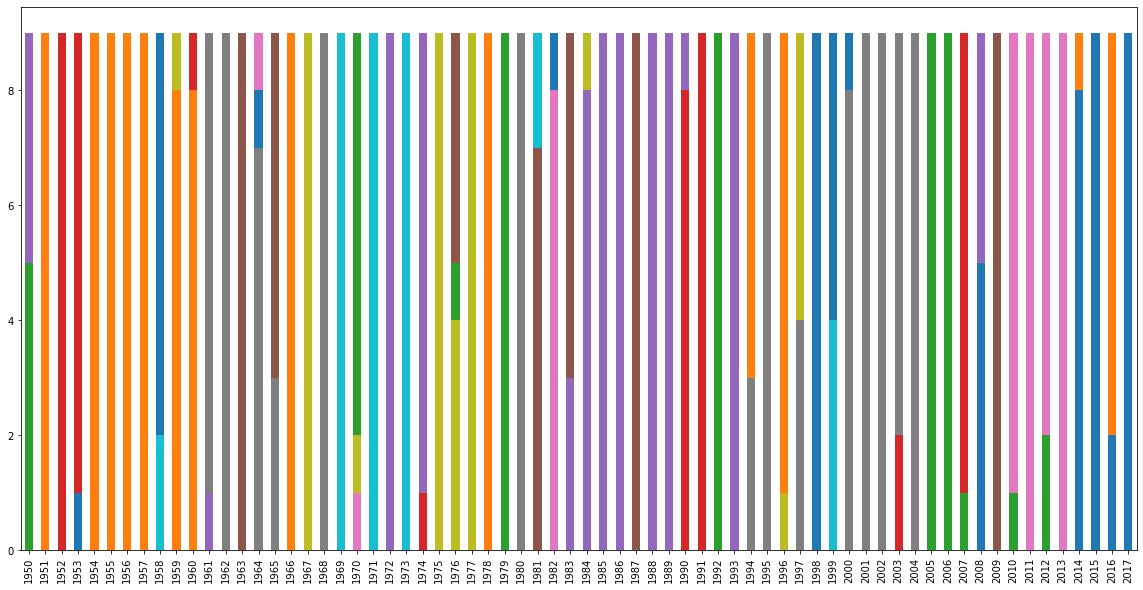

In [323]:
#creating a dataframe to represent how many points systems a driver wins the championship in 
#to find season with most uncertainty based on points spread
championships = pd.DataFrame(columns=drivers_df["driverId"].values, index=champions.index).fillna(0)

#this loop iterates each driver's championship wins for each points system that gives them a win
for i, season in champions.iterrows():
    championships.loc[i, season["champ_real"]] += 1
    championships.loc[i, season["champ_10_18"]] += 1
    championships.loc[i, season["champ_03_09"]] += 1
    championships.loc[i, season["champ_91_02"]] += 1
    championships.loc[i, season["champ_61_90"]] += 1
    championships.loc[i, season["champ_60"]] += 1
    championships.loc[i, season["champ_50_59"]] += 1
    championships.loc[i, season["champ_reverse"]] += 1
    championships.loc[i, season["champ_exp"]] += 1
    
#removing any drivers that have no wins
championships = championships.loc[:, (championships != 0).any(axis=0)].rename(columns=driverIdMap)

#plotting stacked bar chart of championship winners
#each segment of bar represents one championship win
#if a bar is a solid color, it means every points system yielded the same champion
championships.plot.bar(stacked=True, figsize=(20,10), legend=False);

This graph is quite busy to look at, so let's remove the seasons where champion is the same regardless of points system.

Out of 68 seasons, 28 yielded a different champion when using a different points system.


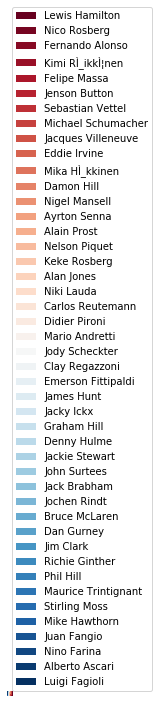

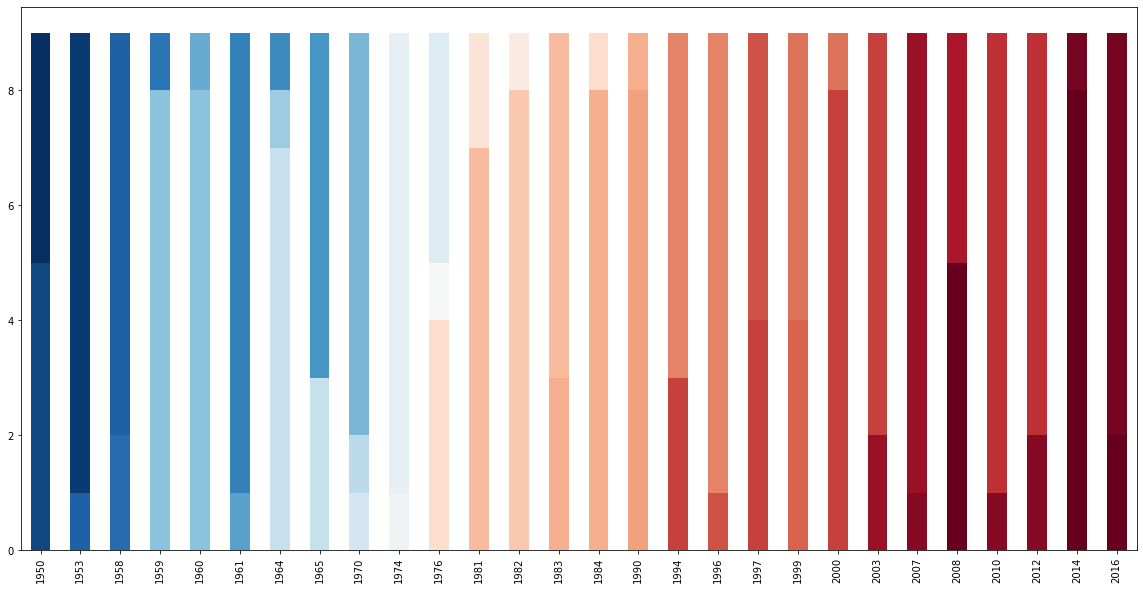

In [324]:
uncertain_seasons = championships.loc[~(championships == 9).any(axis=1), :]
print("Out of " + str(championships.shape[0]) + " seasons, " + 
      str(uncertain_seasons.shape[0]) + " yielded a different champion when using a different points system.")

#making the same plot, excluding seasons that were always decided the same way
#first plot is only to display legend
uncertain_seasons.plot.bar(stacked=True, figsize=(0.1,0.1), cmap="RdBu").axis('off')
uncertain_seasons.plot.bar(stacked=True, figsize=(20,10), legend=False, cmap="RdBu");

## Instead of this, graph the number of different people that could've won in any given year
## heapmap of # of people who couldve finished in every position
## position vs year and num drivers as heat

As this chart more clearly shows, most of the recorded seasons are hard to predict in different systems. The chart demonstrates the unpredictability, but it isn't great at showing us the various winners and losers of these systems and the ends are hard to see. For that, let's take a numeric approach.

First let's look at drivers who never won a championship but would have in a different system.

In [325]:
#getting a list of the actual champions
real_winners = champions["champ_real"].unique()

#getting a list of the champions from other systems
#this is done by creating a set, which is a key-only dictionary, to avoid duplicates and then converting it to a list
fake_winners = list(set().union(champions["champ_10_18"].unique(), 
                                champions["champ_03_09"].unique(), 
                                champions["champ_91_02"].unique(), 
                                champions["champ_61_90"].unique(),
                                champions["champ_60"].unique(),
                                champions["champ_50_59"].unique(),
                                champions["champ_reverse"].unique(),
                               ))


#empty list for drivers who would have won a championship in a different system
new_winners = []
print("The following is the list of all actual Formula 1 world champions from 1950 to 2017:")
for i in real_winners:
    print(driverIdMap[i])

print()

print("The following is the list of champions under the other points systems:")
for i in fake_winners:
    print(driverIdMap[i])
    if(i not in real_winners):
        new_winners.append(i)




The following is the list of all actual Formula 1 world champions from 1950 to 2017:
Nino Farina
Juan Fangio
Alberto Ascari
Mike Hawthorn
Jack Brabham
Phil Hill
Graham Hill
Jim Clark
Denny Hulme
Jackie Stewart
Jochen Rindt
Emerson Fittipaldi
Niki Lauda
James Hunt
Mario Andretti
Jody Scheckter
Alan Jones
Nelson Piquet
Keke Rosberg
Alain Prost
Ayrton Senna
Nigel Mansell
Michael Schumacher
Damon Hill
Jacques Villeneuve
Mika HÌ_kkinen
Fernando Alonso
Kimi RÌ_ikkÌ¦nen
Lewis Hamilton
Jenson Button
Sebastian Vettel
Nico Rosberg

The following is the list of champions under the other points systems:
Lewis Hamilton
Nino Farina
Nico Rosberg
Fernando Alonso
Richie Ginther
Alberto Ascari
Kimi RÌ_ikkÌ¦nen
Nelson Piquet
Felipe Massa
Jenson Button
Phil Hill
Sebastian Vettel
Luigi Fagioli
Michael Schumacher
Graham Hill
Jacques Villeneuve
Maurice Trintignant
Denny Hulme
Keke Rosberg
Alan Jones
Niki Lauda
Eddie Irvine
Mika HÌ_kkinen
Mike Hawthorn
Juan Fangio
Damon Hill
Jackie Stewart
Carlos Reutemann
Ma

In [326]:
print("The following is the list of drivers who could have won a championship if F1 used a different points system at the time:")
for i in new_winners:
    print(driverIdMap[i])

The following is the list of drivers who could have won a championship if F1 used a different points system at the time:
Richie Ginther
Felipe Massa
Luigi Fagioli
Maurice Trintignant
Eddie Irvine
Carlos Reutemann
Stirling Moss
Clay Regazzoni
Bruce McLaren
Jacky Ickx
Dan Gurney


So now we've established a list of drivers who would have won a championship if they used a different points system. Let's compare this to the drivers mentioned in the top 3 Google search results for "formula 1 drivers who should've won a championship". Here are the 3 top results for reference:

[Ranking the Best Formula 1 Drivers to Never Win the World Title
](https://bleacherreport.com/articles/1980156-ranking-the-best-formula-1-drivers-to-never-win-the-world-title)

[The 6 best F1 drivers never to win a championship
](https://www.redbull.com/us-en/the-best-f1-driver-who-never-won-the-world-championship)

[Top 10 Formula One drivers who have never won a World Championship](https://www.sportskeeda.com/slideshow/top-drivers-never-won-world-champs)

The drivers on these lists are:
<ul>
    <li>Didier Pironi</li>
    <li>Jacky Ickx</li>
    <li>Tony Brooks</li>
    <li>Clay Regazzoni</li>
    <li>Wolfgang von Trips</li>
    <li>Stirling Moss</li>
    <li>Mark Webber</li>
    <li>Gerhard Berger</li>
    <li>Rubens Barrichello</li>
    <li>Felipe Massa</li>
    <li>Gilles Villeneuve</li>
    <li>Carlos Reutemann</li>
    <li>Ronnie Peterson</li>
    <li>David Coulthard</li>
</ul>

Let's save this list in our code:

In [327]:
#hard coding search results
internet_drivers = ['Didier Pironi','Jacky Ickx','Tony Brooks','Clay Regazzoni','Wolfgang von Trips','Stirling Moss','Mark Webber','Gerhard Berger','Rubens Barrichello','Felipe Massa','Gilles Villeneuve','Carlos Reutemann','Ronnie Peterson','David Coulthard']
#new list for names of new winners
new_winner_names = new_winners.copy()

#gathering names from new_winners
for i in range(len(new_winner_names)):
    new_winner_names[i] = driverIdMap[new_winner_names[i]]
    
#finding drivers in both lists
drivers_intersection = [value for value in new_winner_names if value in internet_drivers]

print("Out of the " + str(len(new_winners)) + " drivers that could have won championships, " +
     str(len(drivers_intersection)) + " of them were listed in the afforementioned search results.")
print("Here are those drivers:")
print(drivers_intersection)

Out of the 11 drivers that could have won championships, 5 of them were listed in the afforementioned search results.
Here are those drivers:
['Felipe Massa', 'Carlos Reutemann', 'Stirling Moss', 'Clay Regazzoni', 'Jacky Ickx']


Now that we've identified some drivers who could have won championships, and some thing should have, let's see what systems would have benefitted them and other drivers.

The system that yielded the most changes was champ_reverse
The driver that experienced the most gain was Felipe Massa


,year,driver,system,in_intersection
0,1964,386,champ_reverse,False
1,2008,13,champ_91_02,True
2,2008,13,champ_61_90,True
3,2008,13,champ_60,True
4,2008,13,champ_exp,True
5,1950,786,champ_03_09,False
6,1950,786,champ_60,False
7,1950,786,champ_50_59,False
8,1950,786,champ_reverse,False
9,1959,427,champ_reverse,False


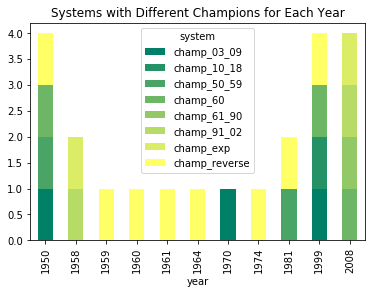

In [328]:
#dictionary to convert driver names back to ids
idDriverMap = dict((v,k) for k,v in driverIdMap.items())
#initializing driver id list for the intersection
intersection_ids = drivers_intersection.copy()

for i in range(len(intersection_ids)):
    intersection_ids[i] = idDriverMap[intersection_ids[i]]
    
#intializing a dataframe for potential champion seasons
would_be_champs = pd.DataFrame(columns=["year", "driver", "system", "in_intersection"])

#getting a list of points systems
pointsSystems = list(champions.columns)[1:]

#a variable to iterate through for entries
champ_num = 0


for driverID in new_winners:
#iterating through each points system
    for system in pointsSystems:
        #getting a list of years where the driver would have been champion in that system
        champ_years = list(champions[champions[system] == driverID].index)
        #adding entries to would_be_champs
        for year in champ_years:
            would_be_champs.loc[champ_num, 'year'] = year
            would_be_champs.loc[champ_num, 'driver'] = driverID
            would_be_champs.loc[champ_num, 'system'] = system
            would_be_champs.loc[champ_num, 'in_intersection'] = (driverID in intersection_ids)
            champ_num -= -1
        
print("The system that yielded the most changes was " + would_be_champs["system"].value_counts().idxmax())
print("The driver that experienced the most gain was " + driverIdMap[would_be_champs["driver"].value_counts().idxmax()])
would_be_champs.groupby("year")["system"].value_counts().unstack().plot.bar(stacked=True, cmap="summer");
plt.title("Systems with Different Champions for Each Year");
would_be_champs


A few things about points systems are more evident after these analyses. Some systems change the results much more than others. This is in part due to many of the systems being iterative, rather than complete overhauls. Clearly some fans think that some of these systems would be better since they benefit their favorite drivers, but that's not to say that the drivers that did win did not deserve to win. Let's look at the drivers who actually won these seasons and use historical context to determine if a different system is neccessary.

### Comparing Actual Champions to Potential Champions

In [329]:
#getting list of years where champion changed
changed_years = would_be_champs["year"].unique()
#series of champions in these years
real_champs = champions.loc[changed_years]["champ_real"]
#series of champions that could have been
fake_champs = would_be_champs.groupby("year")["driver"].sum() / would_be_champs.groupby("year")["driver"].count()
#concatenating these two series
champ_vs_runner_df = pd.concat([real_champs, fake_champs], axis=1)

for i, year in champ_vs_runner_df.iterrows():
    champ = driverIdMap[year["champ_real"]]
    runner_up = driverIdMap[year["driver"]]
    print(runner_up + " would have won instead of " + champ + " in " + str(i) + ".")

Luigi Fagioli would have won instead of Nino Farina in 1950.
Stirling Moss would have won instead of Mike Hawthorn in 1958.
Maurice Trintignant would have won instead of Jack Brabham in 1959.
Bruce McLaren would have won instead of Jack Brabham in 1960.
Dan Gurney would have won instead of Phil Hill in 1961.
Richie Ginther would have won instead of Graham Hill in 1964.
Jacky Ickx would have won instead of Jochen Rindt in 1970.
Clay Regazzoni would have won instead of Emerson Fittipaldi in 1974.
Carlos Reutemann would have won instead of Nelson Piquet in 1981.
Eddie Irvine would have won instead of Mika HÌ_kkinen in 1999.
Felipe Massa would have won instead of Lewis Hamilton in 2008.


Looking into these seasons reveals that many of them are contentious.

Stirling Moss won 4 of the 11 races in the 1958 season, while Mike Hawthorne only won 1, but his slew of 2nd place finishes kept him in the lead of the championship. This is perhaps the most clear case of a poorly decided championship, but many would argue that Moss's 5 DNFs are good reason to settle for 2nd place.

Jacky Ickx could have surpassed Jochen Rindt, who died on track halfway through the 1970 season and did not compete in the last 4 races, but held on to the title thanks to 5 race wins.

Clay Regazzoni finished only 3 points behind Emerson Fittipaldi. Although Fittipaldi had 3 race wins to Regazzoni's 1, the latter had a higher average finishing position.

Felipe Massa lost the 2008 championship by just 1 point in spectacular fashion in the last race of the season and many fans believe he should have been crowned champion instead of Hamilton.


Now that we've seen the effects of different point systems, it is time to evaluate them. Before we focus in on these few seasons, we should modify our would_be_champs dataframe to contain all would-bes rather than just drivers who were never crowned champion.

,year,driver,system
0,2016,1,champ_91_02
1,2016,1,champ_exp
2,2014,3,champ_reverse
3,2012,4,champ_50_59
4,2007,4,champ_reverse


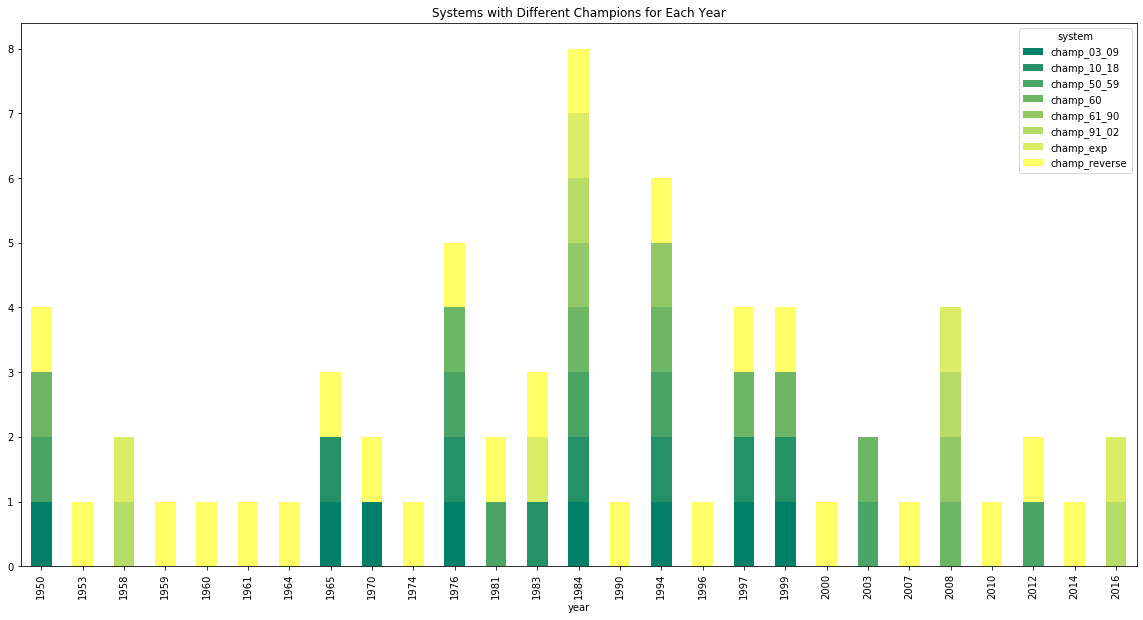

In [330]:
#intializing a dataframe for potential champion seasons
could_be_champs = pd.DataFrame(columns=["year", "driver", "system"])

#getting a list of points systems
pointsSystems = list(champions.columns)[1:]

#a variable to iterate through for entries
champ_num = 0


for driverID in fake_winners:
#iterating through each points system
    for system in pointsSystems:
        #getting a list of years where the driver would have been champion in that system
        champ_years = list(champions[champions[system] == driverID].index) 
        #intersecting to only years where the results will be changed
        changed_years = [value for value in list(uncertain_seasons.index) if value in champ_years]
        #adding entries to would_be_champs
        for year in changed_years:
            if(champions["champ_real"][year] != driverID):
                could_be_champs.loc[champ_num, 'year'] = year
                could_be_champs.loc[champ_num, 'driver'] = driverID
                could_be_champs.loc[champ_num, 'system'] = system
                champ_num -= -1
            

could_be_champs.groupby("year")["system"].value_counts().unstack().plot.bar(stacked=True, cmap="summer", figsize=(20,10));
plt.title("Systems with Different Champions for Each Year");
could_be_champs.head()

An interesting wrench thrown into this data is evident in the 1984 season. Alain Prost won the Monaco GP, but half-points were given out for that race since less than 75% of the race was completed. Since he lost the championship by only half a point that year, it is unsurprising that all points systems give him the victory without ac counting for this artifact.

In [331]:
#getting list of systems
systems = could_be_champs["system"].unique()

#iterating through each system
for system in systems:
    #changed results for each system
    changed = could_be_champs[could_be_champs["system"] == system]
    print(system)
    print(changed["year"].values)
    


champ_91_02
[2016 2008 1958 1984]
champ_exp
[2016 2008 1958 1983 1984]
champ_reverse
[2014 2007 2010 2012 1964 1950 1997 1965 1996 1959 1970 1999 2000 1953
 1994 1981 1976 1974 1960 1961 1983 1984 1990]
champ_50_59
[2012 2003 1950 1976 1994 1981 1984]
champ_60
[2003 2008 1950 1997 1976 1999 1994 1984]
champ_61_90
[2008 1994 1984]
champ_03_09
[1950 1997 1965 1976 1999 1994 1970 1984]
champ_10_18
[1997 1965 1976 1999 1994 1983 1984]


In [382]:
#grouping results info by driver and year
driver_seasons = results_df.merge(races_df[["raceId", "year"]], on='raceId').groupby(["year", "driverId"])

drivers_season_standings["average_position"] = 0
drivers_season_standings["podiums"] = 0

#iterating through groups to add addtional stats to drivers_season_standings
for i, df in driver_seasons:
    dss_index = drivers_season_standings[drivers_season_standings['driverId'] == i[0]][drivers_season_standings['year'] == i[1]].index
    drivers_season_standings.iloc[dss_index, drivers_season_standings.columns.get_loc('average_position')] = df["position"].sum() / races_in_year[i[0]]
    #drivers_season_standings.loc[[i[0], i[1]], 'average_position'] = df["position"].sum() / races_in_year[i[0]]
    
    avg_position  = df["position"].sum() / races_in_year[i[0]]
    num_podiums = df[df["position"] <= 3]

drivers_season_standings.average_position.value_counts()

/Users/masonoconnor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


0.0
0.0
1.1428571428571428
3.4285714285714284
1.7142857142857142
2.2857142857142856
2.142857142857143
0.7142857142857143
0.0
1.2857142857142858
1.4285714285714286
0.42857142857142855
1.7142857142857142
0.14285714285714285
0.0
0.0
1.7142857142857142
0.5714285714285714
3.0
0.0
0.8571428571428571
1.7142857142857142
0.0
2.0
1.2857142857142858
2.4285714285714284
1.0
2.0
3.0
5.142857142857143
0.0
0.0
1.2857142857142858
2.857142857142857
0.42857142857142855
1.4285714285714286
0.7142857142857143
0.2857142857142857
1.7142857142857142
1.1428571428571428
0.0
0.0
2.5714285714285716
0.0
2.5714285714285716
0.0
0.0
0.0
0.0
0.0
0.0
0.8571428571428571
0.42857142857142855
0.5714285714285714
2.7142857142857144
1.8571428571428572
1.0
0.7142857142857143
0.0
1.4285714285714286
3.0
1.2857142857142858
1.2857142857142858
1.5714285714285714
1.0
1.4285714285714286
0.0
0.0
0.0
0.0
0.5714285714285714
0.7142857142857143
1.5714285714285714
3.142857142857143
3.2857142857142856
0.0
0.0
1.0
0.8571428571428571
0.2857142

0.9
1.7
1.0
4.5
0.6
1.4
0.0
4.1
3.5
3.5
2.9
0.8
0.7
0.0
0.3
1.0
1.4
0.7
0.2
0.9
0.8
0.0
0.9
5.3
0.2
0.6
1.4
3.3
3.3
0.0
1.3
0.0
0.0
0.7
0.4
0.9
1.0
1.1
2.8
0.0
0.0
0.0
0.0
0.0
0.8
1.0
0.0
0.1
0.3
0.4
0.5
0.6
0.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
1.9
2.0
2.1
2.2
2.3
2.4
2.5
2.6
2.7
2.8
2.9
3.0
3.1
3.2
3.3
0.0
0.6
1.2
0.4
0.8
1.0
0.0
0.0
1.3
2.375
3.5
6.0
1.25
5.5
5.125
4.875
0.0
2.5
4.5
0.125
1.625
2.625
1.875
3.0
4.125
0.0
0.0
3.625
0.0
0.0
7.75
0.0
0.0
1.25
0.0
0.0
5.0
0.0
1.25
0.0
0.0
2.75
0.0
2.125
3.75
1.875
2.0
1.875
0.0
1.0
1.75
1.25
1.0
4.625
6.5
1.375
2.625
1.875
0.0
0.0
0.0
0.0
0.0
0.0
1.5
0.0
0.0
0.0
1.125
0.0
0.0
3.0
0.8888888888888888
2.0
2.4444444444444446
4.222222222222222
3.0
2.3333333333333335
3.4444444444444446
0.0
1.7777777777777777
2.7777777777777777
1.2222222222222223
3.6666666666666665
2.111111111111111
0.0
3.3333333333333335
2.111111111111111
3.2222222222222223
4.333333333333333
0.6666666666666666
0.0
1.1111111111111112
2.7777777777777777
0.0
2.6666666666666

2.764705882352941
0.5882352941176471
3.176470588235294
3.4705882352941178
5.176470588235294
0.4117647058823529
0.0
0.0
3.6470588235294117
0.0
0.8823529411764706
1.2352941176470589
0.0
0.4117647058823529
0.35294117647058826
3.3529411764705883
1.588235294117647
0.0
4.764705882352941
1.588235294117647
0.0
0.0
0.5294117647058824
0.0
0.0
0.0
0.0
2.0588235294117645
0.0
0.0
1.0
0.0
0.5294117647058824
0.6470588235294118
0.0
2.8125
1.25
1.8125
0.0
2.5625
6.125
4.5
2.5625
4.3125
0.875
2.9375
2.875
3.9375
4.0
5.0625
4.25
1.5
2.875
0.0
0.0
0.6875
2.4375
0.0
2.4375
1.9375
3.375
4.0
3.75
0.6875
5.125
2.375
0.0
2.75
0.75
1.375
3.75
0.0
0.0
0.0
4.8125
0.0
0.0
0.0
0.0
0.0
0.75
4.133333333333334
5.6
2.066666666666667
1.1333333333333333
1.4666666666666666
1.4
4.6
3.3333333333333335
0.0
0.6
1.9333333333333333
0.6666666666666666
4.133333333333334
2.6
3.1333333333333333
5.133333333333334
3.8
3.466666666666667
2.1333333333333333
2.066666666666667
0.4666666666666667
1.8666666666666667
0.4666666666666667
1.666

8.052631578947368
6.052631578947368
5.7894736842105265
4.7894736842105265
3.3157894736842106
0.0
3.4210526315789473
6.7368421052631575
6.0
0.8947368421052632
0.15789473684210525
9.526315789473685
3.210526315789474
2.6842105263157894
5.2631578947368425
12.0
8.421052631578947
0.2631578947368421
4.7368421052631575
9.947368421052632
3.789473684210526
0.0
1.8421052631578947
7.388888888888889
4.944444444444445
1.7222222222222223
2.5
2.5555555555555554
8.166666666666666
3.9444444444444446
6.833333333333333
6.833333333333333
3.388888888888889
4.166666666666667
4.111111111111111
6.5
5.0
9.38888888888889
9.61111111111111
7.444444444444445
2.7222222222222223
2.2777777777777777
1.1111111111111112
4.888888888888889
8.833333333333334
0.7222222222222222
4.333333333333333
2.7777777777777777
2.111111111111111
2.0555555555555554
2.823529411764706
4.705882352941177
7.529411764705882
2.764705882352941
7.411764705882353
0.5882352941176471
2.2941176470588234
5.117647058823529
11.235294117647058
3.2352941176

0.0    3038
Name: average_position, dtype: int64

In [375]:
drivers_season_standings.iloc[drivers_season_standings[drivers_season_standings['driverId'] == 1][drivers_season_standings['year'] == 2008].index]

/Users/masonoconnor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,driverStandingsId,raceId,driverId,points,position,wins,year,round,circuitId,name,date,time,average_position,podiums
0,355,35,1,98.0,1,5,2008,18,18,Brazilian Grand Prix,2008-11-02,17:00:00,0.0,0
